In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from glob import glob
import numpy as np
from numpy import ndarray
from typing import List

import sys
import os
sys.path.append("/".join(os.getcwd().split("/")[:-2]))
print(sys.path)
from utils.plot import plot_curves

['/home/uhrich/Bachelorthesis/documentation/figures', '/home/uhrich/miniconda3/envs/BT/lib/python38.zip', '/home/uhrich/miniconda3/envs/BT/lib/python3.8', '/home/uhrich/miniconda3/envs/BT/lib/python3.8/lib-dynload', '', '/home/uhrich/.local/lib/python3.8/site-packages', '/home/uhrich/miniconda3/envs/BT/lib/python3.8/site-packages', '/home/uhrich/Bachelorthesis', '/home/uhrich/Bachelorthesis', '/home/uhrich/Bachelorthesis', '/home/uhrich/Bachelorthesis']


In [43]:
RESULT_PATH = "/home/uhrich/Bachelorthesis/results/"
FIGURE_PATH = "../thesis/figures/experiments/"
COLORS = ["C" + str(idx) for idx in range(10)]

In [44]:
def get_default_color(idx: int):
    return COLORS[idx % len(COLORS)]


def acquire_curves(dir: str, prefix: str, key: str):
    search_regex = RESULT_PATH + f"{dir}/{prefix}*/results.csv"
    paths = glob(search_regex)
    if not len(paths):
        raise ValueError(f"No matching experiment results with: '{search_regex}' found")
    keys =  pd.read_csv(paths[0])["entity"].unique() 
    if key not in keys:
        print(keys)
        return
    
    data = []
    for path in paths:
        df = pd.read_csv(path)
        key_df = df[df["entity"] == key]
        
        data.append(key_df[["x0", "y"]].to_numpy())
    
    data = np.stack(data)
    return data

def plot_vae_comparison(subdir: str, ns_joints: List[int], latent_dims: List[int], key: str,  log_scale: bool = False):
    fig = None
    ax = None
    for idx, (n_joints, latent_dim) in enumerate(zip(ns_joints, latent_dims)):
        prefix = f"{n_joints}_{latent_dim}_"
        data = acquire_curves(subdir, prefix, key)
        fig, ax = plot_curves(curves=data, color=get_default_color(idx), legend=True, grid=True, log_scale=log_scale, label=f"{n_joints}_{latent_dim}", fig=fig, ax=ax)        
    ax.grid()
    ax.set_xlabel("step")
    ax.set_ylabel(key.split("/")[-1])
    ax.set_title(key)

    return fig, ax

def plot_sac_comparison(subdir: str, ns_joints: List[int], key: str):
    fig = None
    ax = None
    for idx, n_joints in enumerate(ns_joints):
        prefix = f"{n_joints}_"
        data = acquire_curves(subdir, prefix, key)
        fig, ax = plot_curves(curves=data, color=get_default_color(idx), legend=True,  grid=True, label=prefix[:-1], fig=fig, ax=ax)
    # ax.grid()
    ax.set_xlabel("step")
    ax.set_title(key)
    ax.set_ylabel(key.split("/")[-1])

    return fig, ax


def plot_sac_latent_dim_difference(n_joints: int, latent_dims: List[int], key: str):
    fig = None
    ax = None
    for idx, latent_dim in enumerate(latent_dims):
        prefix = f"{n_joints}_"
        data = acquire_curves(f"sac/latent_actor_{latent_dim}", prefix, key)
        fig, ax = plot_curves(curves=data, color=get_default_color(idx), legend=True,  grid=True, label=str(latent_dim), fig=fig, ax=ax)
    ax.grid()
    ax.set_title(key)
    ax.set_xlabel("step")
    ax.set_ylabel(key.split("/")[-1])

    return fig, ax


def plot_baseline_comparison(n_joints: int, latent_dims: List[int], key: str):
    fig, ax = plot_sac_comparison(subdir="sac/baseline", ns_joints=[n_joints], key=key)

    for idx, latent_dim in  enumerate(latent_dims):
        prefix = f"{n_joints}_"
        data = acquire_curves(f"sac/latent_actor_{latent_dim}", prefix, key)
        fig, ax = plot_curves(curves=data, color=get_default_color(idx + 1), legend=True,  grid=True, label=str(latent_dim), fig=fig, ax=ax)
    ax.set_xlabel("step")
    ax.set_ylabel(key.split("/")[-1])
    ax.set_title(key)
    return fig, ax


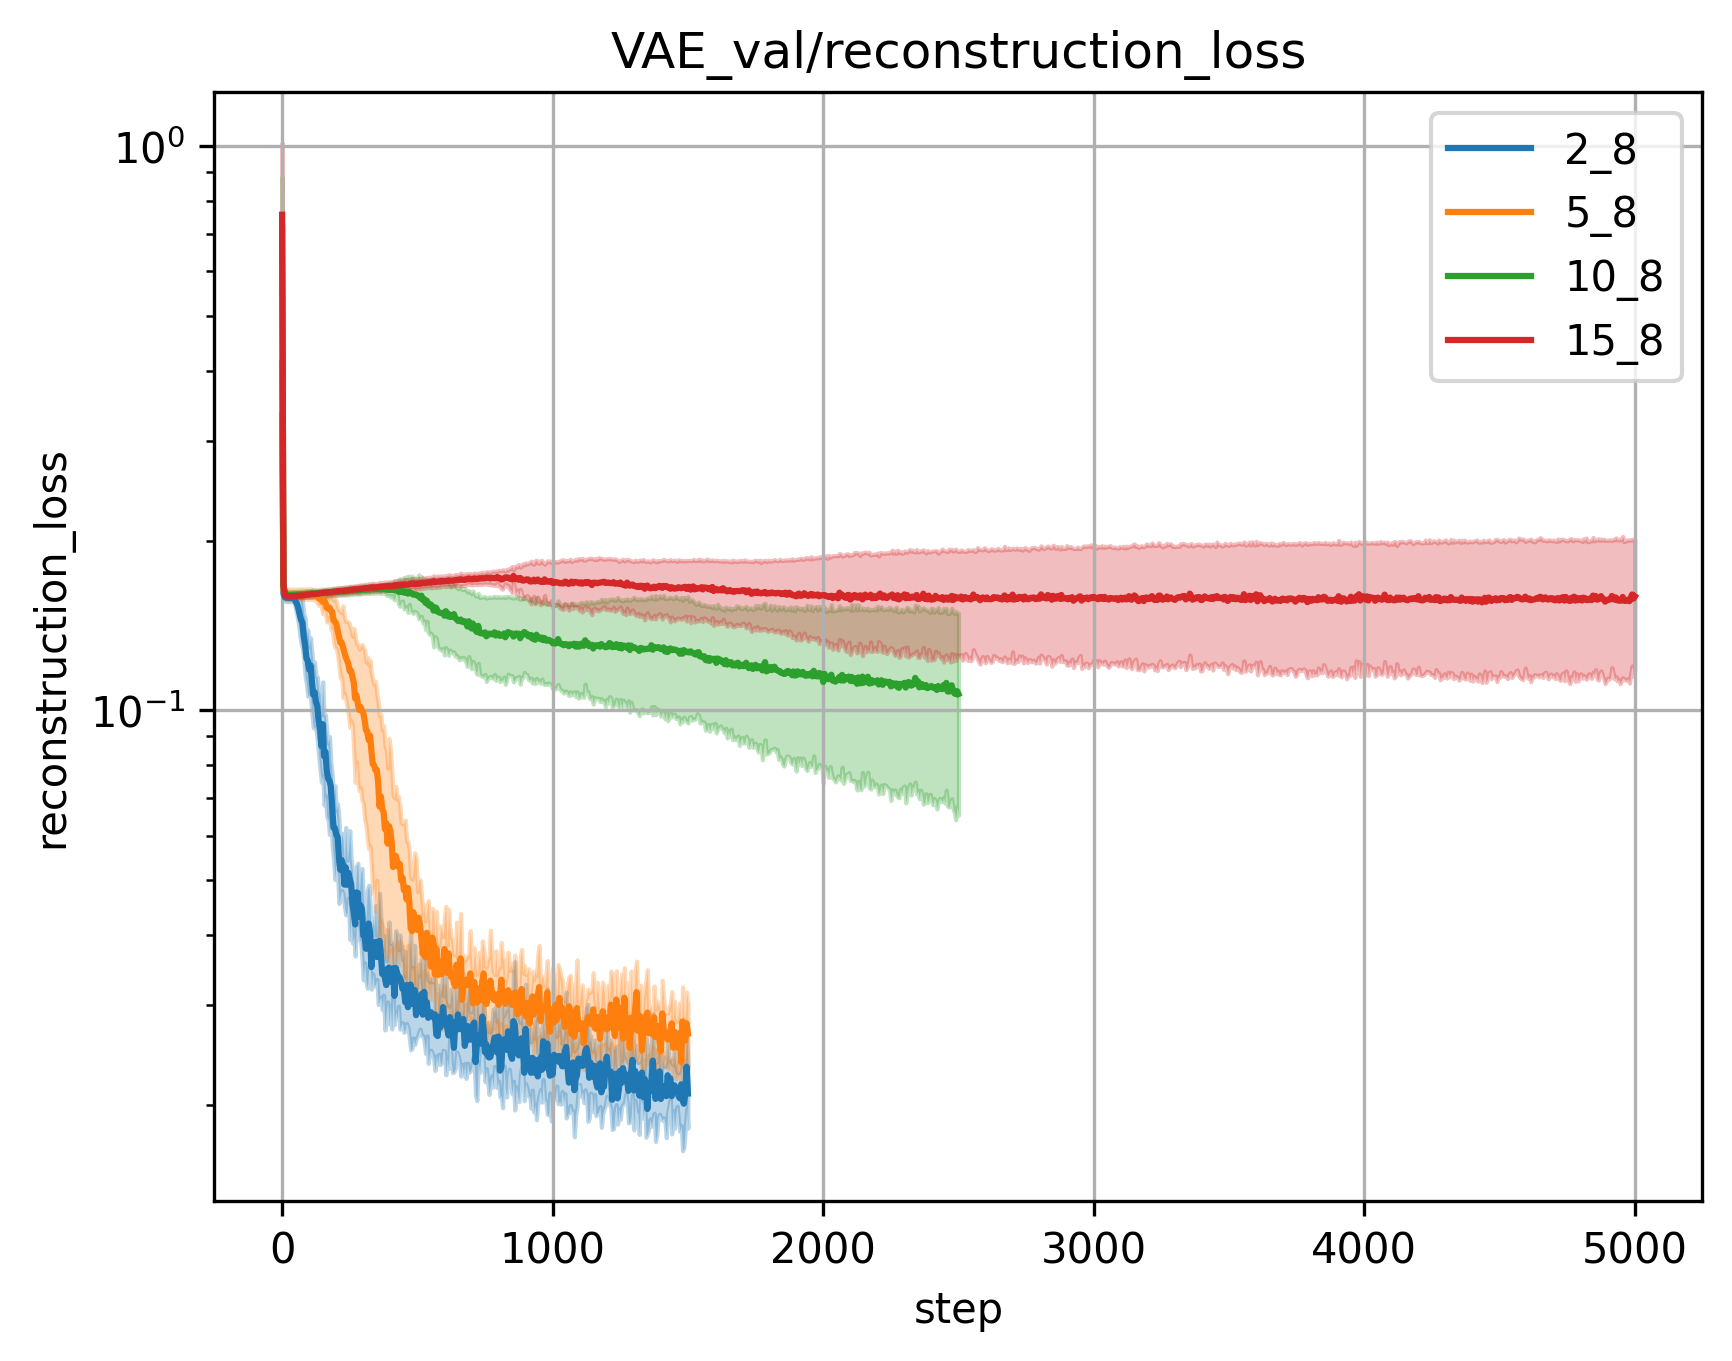

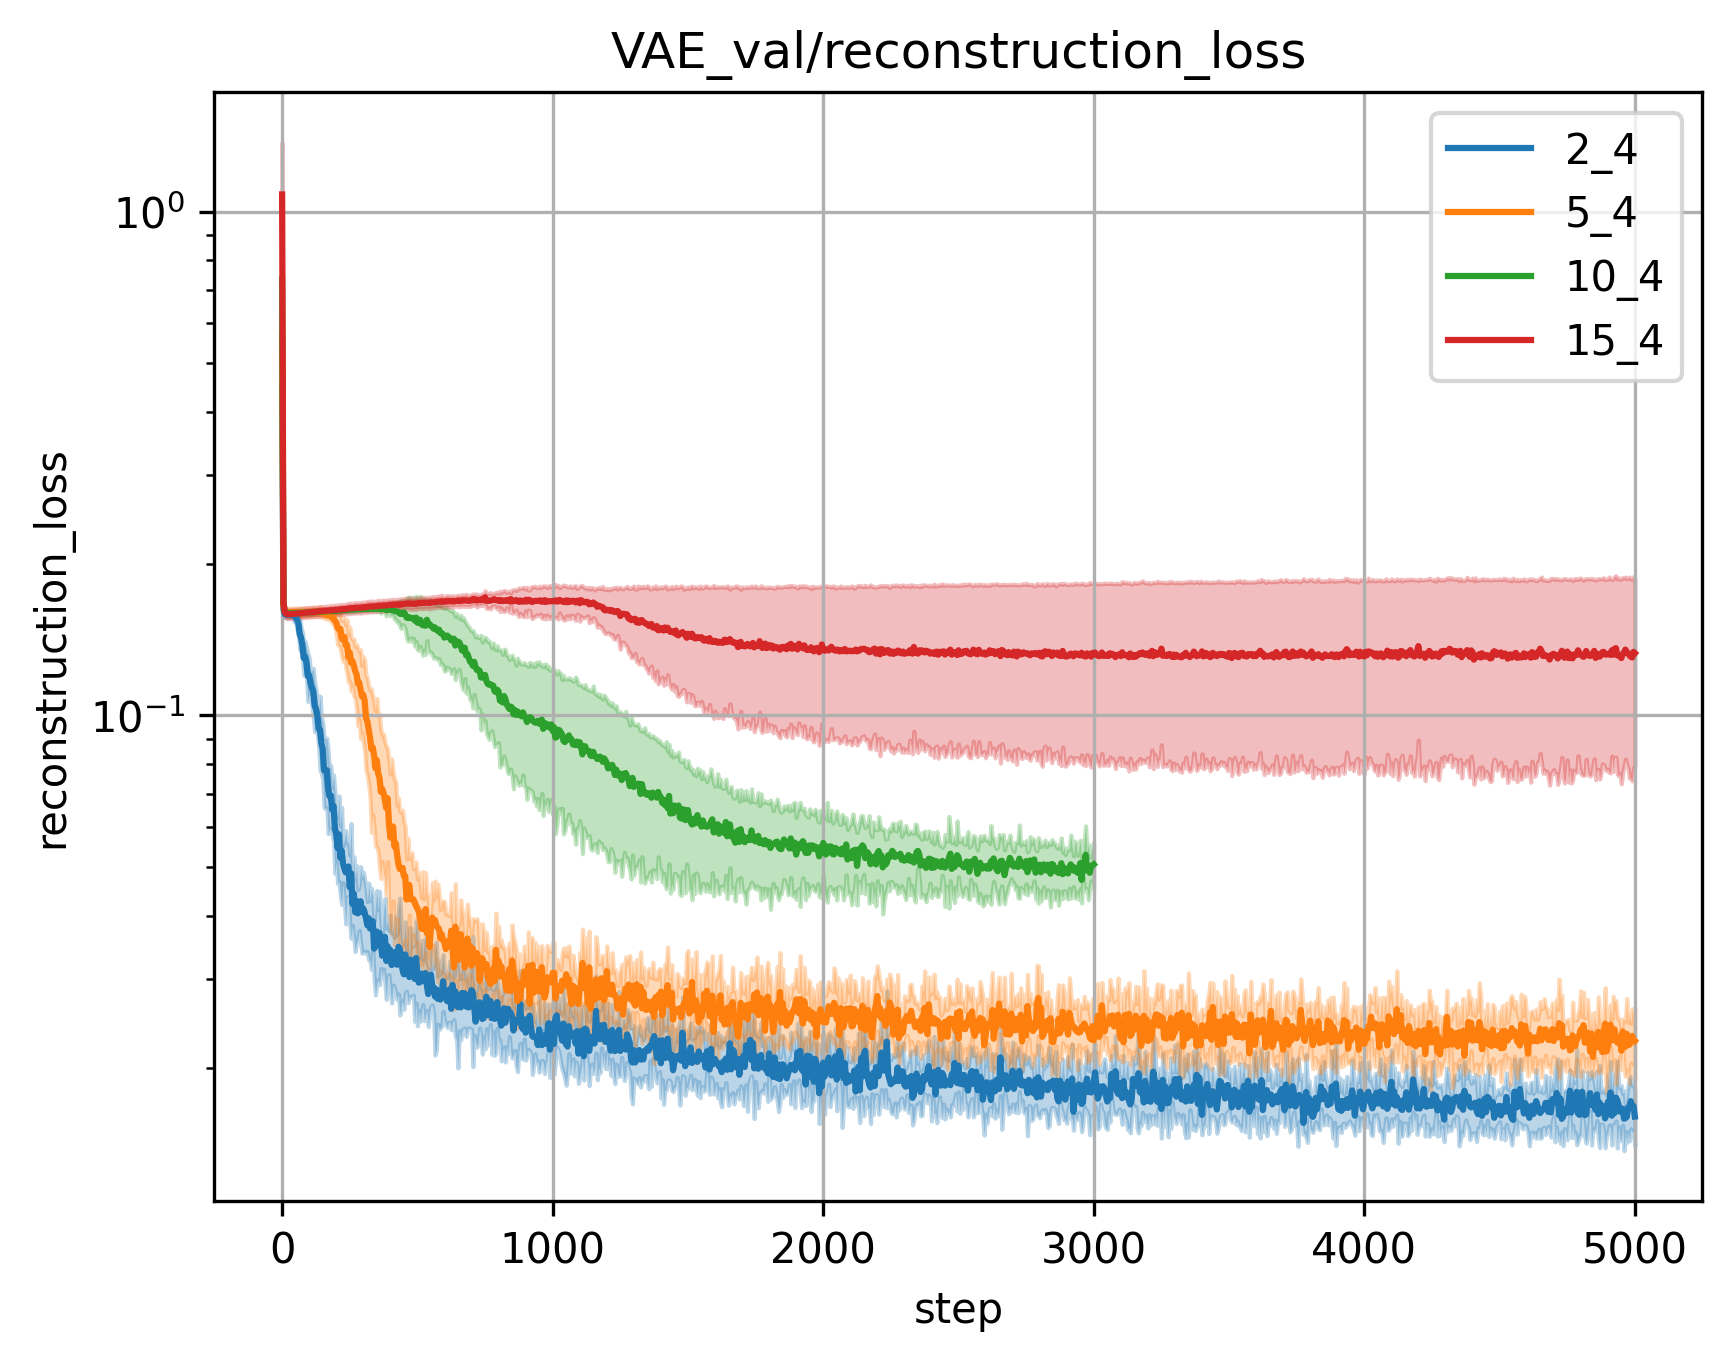

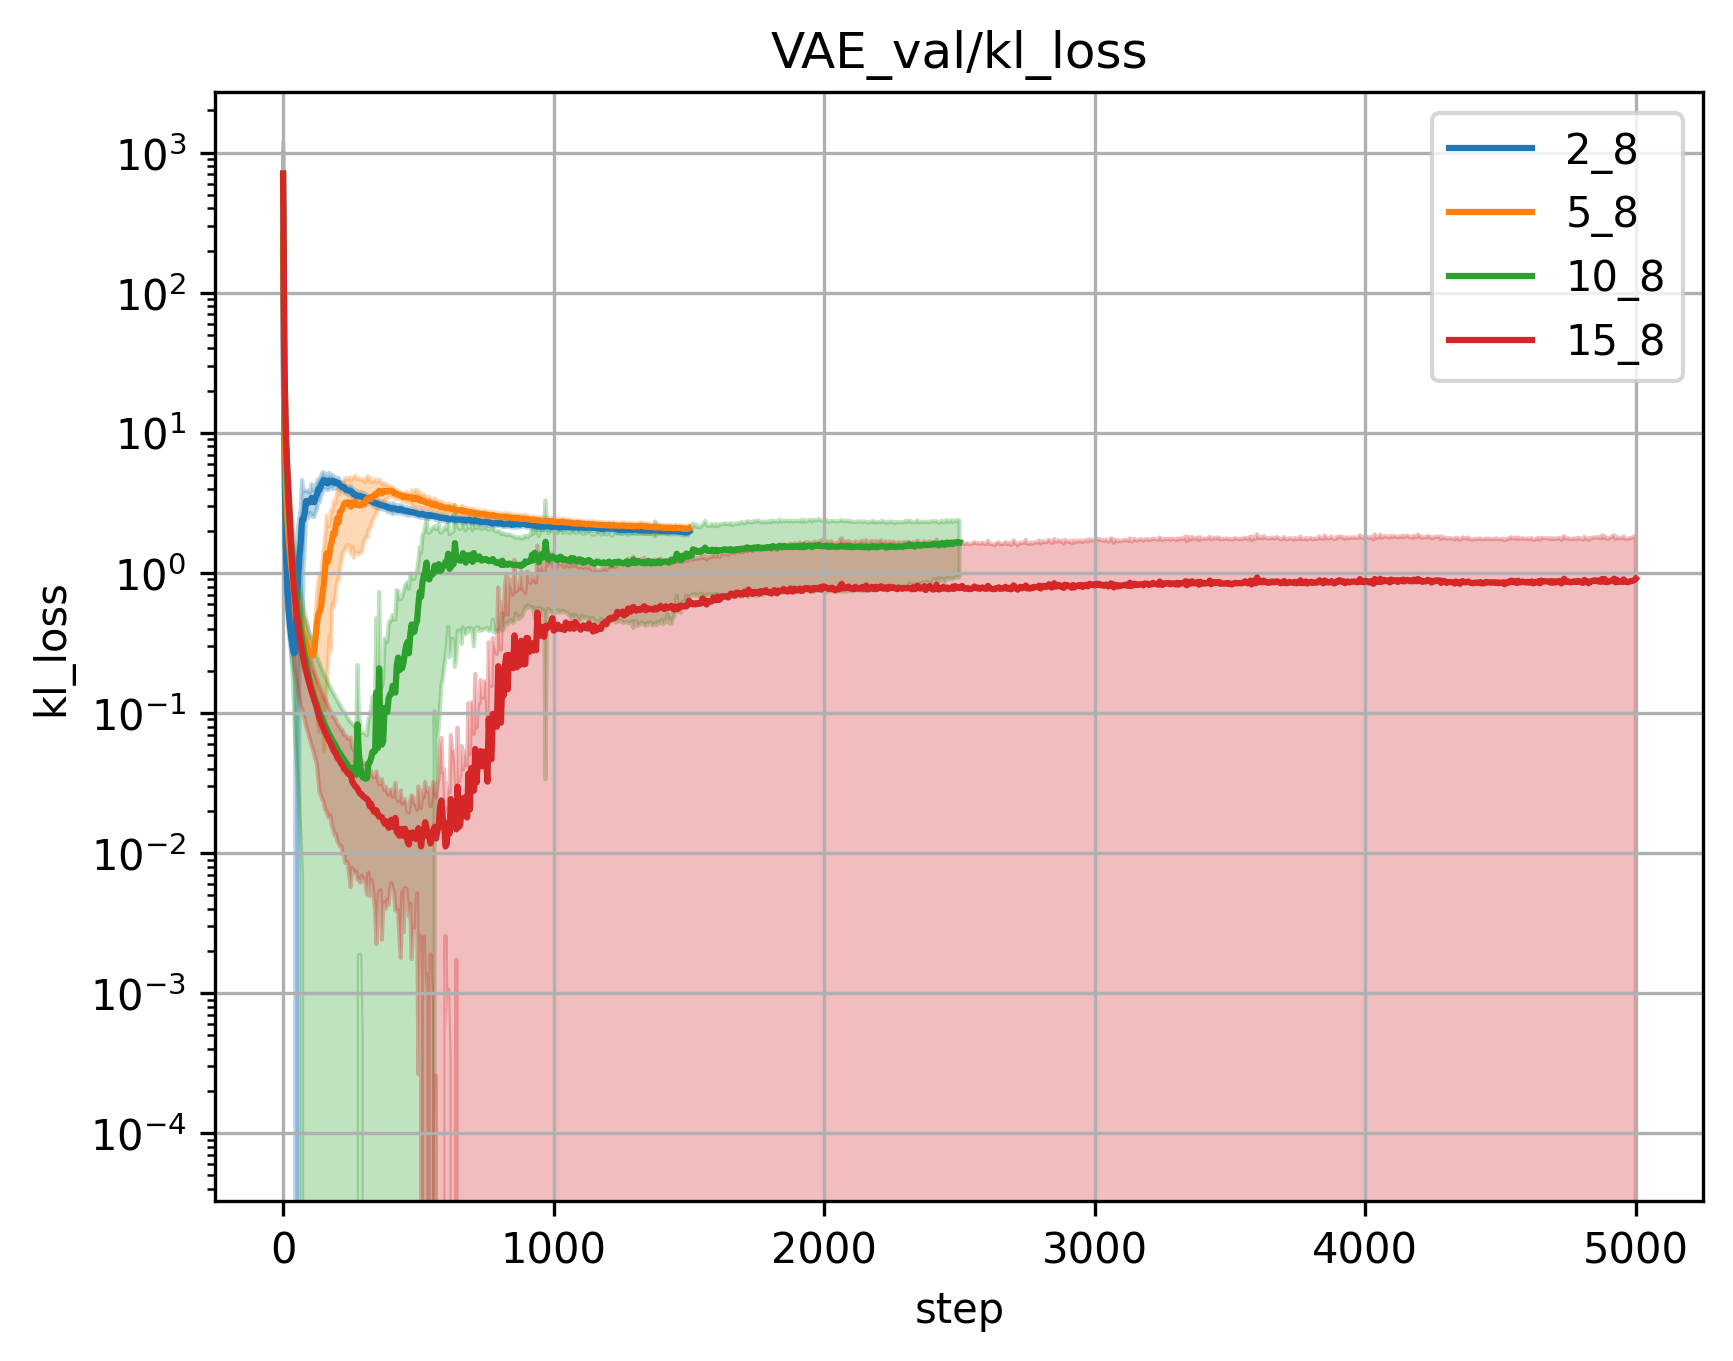

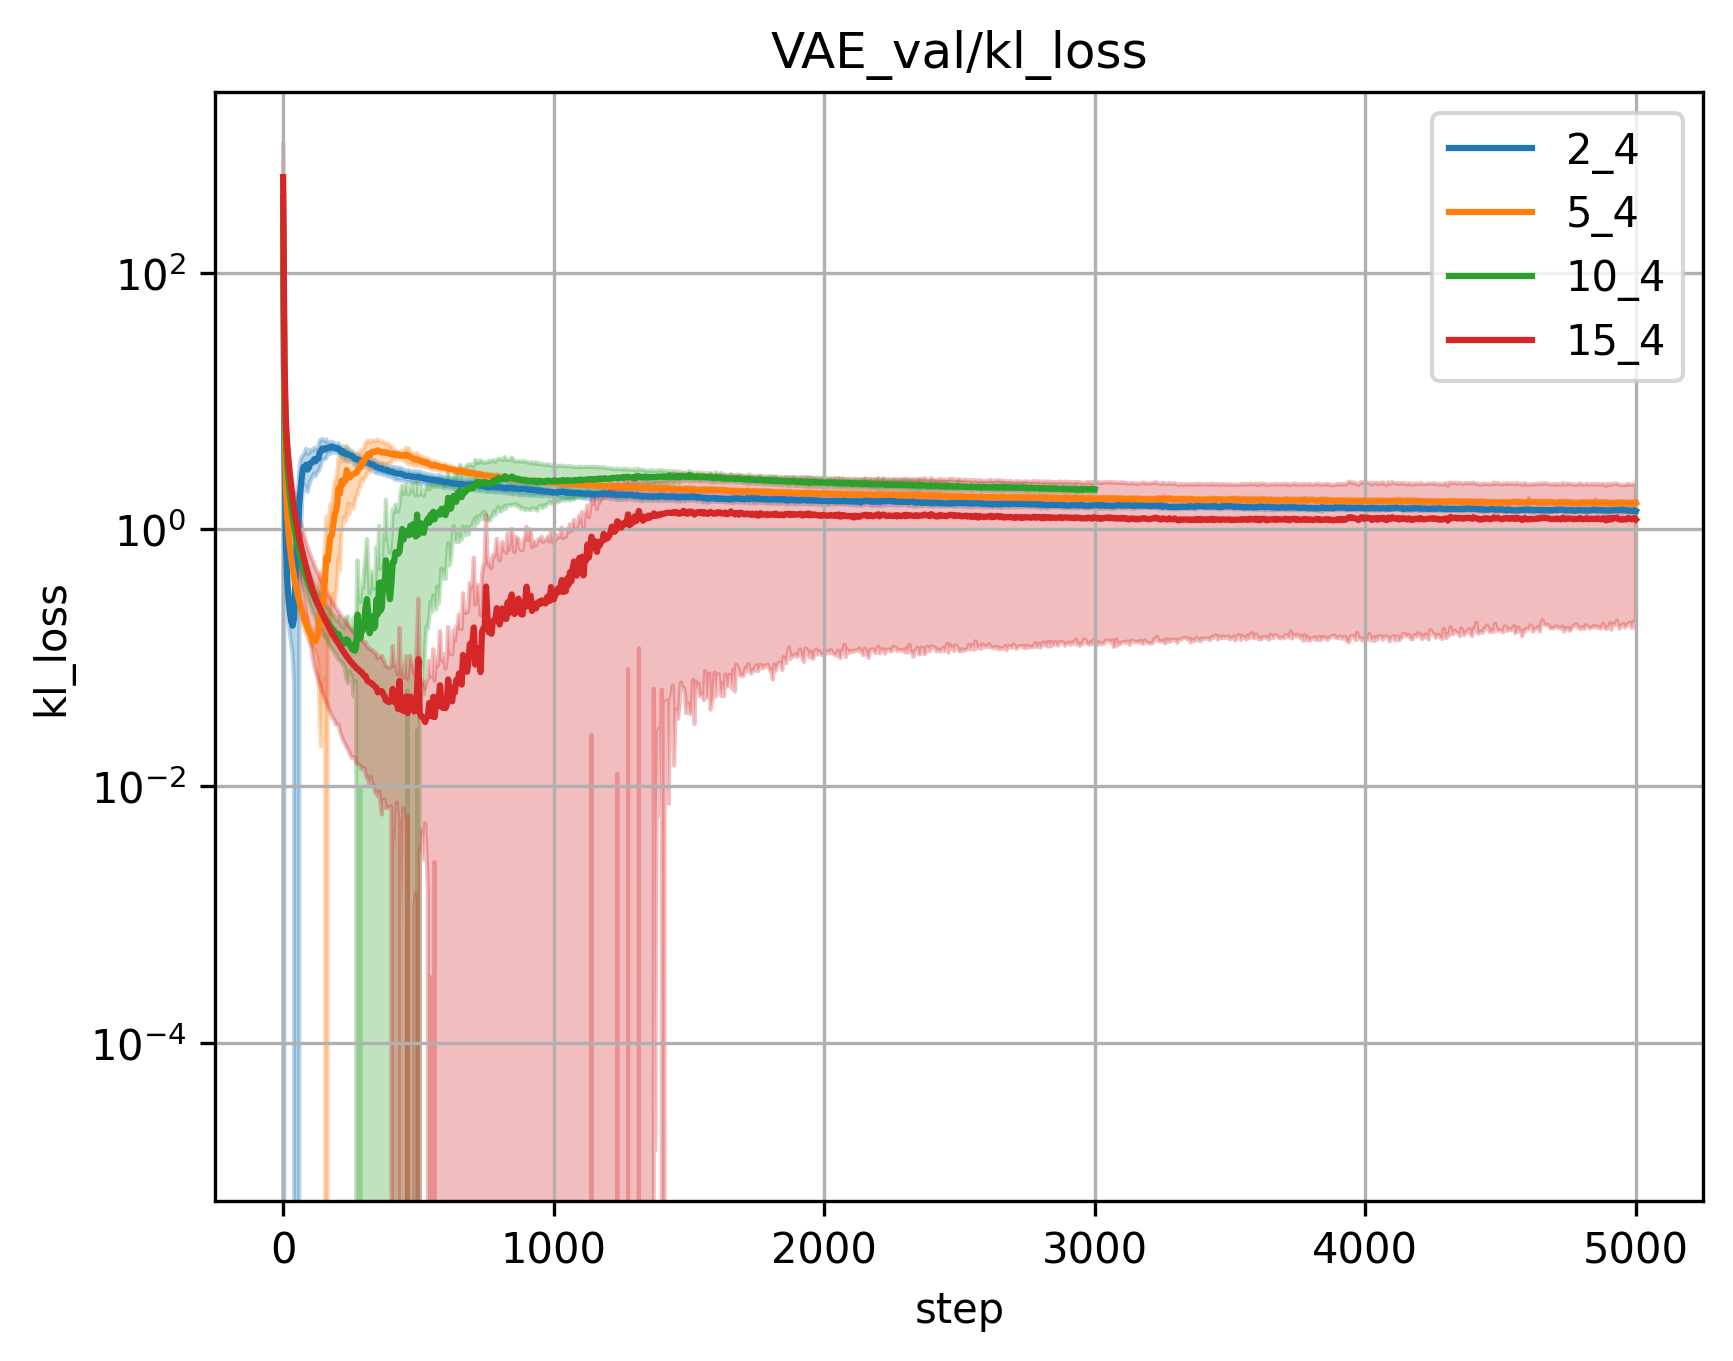

In [48]:
key = "VAE_val/reconstruction_loss"

n_joints = [2, 5, 10, 15]
latent_dims = [8, 8, 8, 8]
fig, ax = plot_vae_comparison("vae/baseline", ns_joints=n_joints, latent_dims=latent_dims, key=key, log_scale=True)
fig.savefig(FIGURE_PATH + "vae_comparison_latent_8_reconstruction_loss.png")

latent_dims = [4,4, 4, 4]
fig, _ = plot_vae_comparison("vae/baseline", ns_joints=n_joints, latent_dims=latent_dims, key=key, log_scale=True)
fig.savefig(FIGURE_PATH + "vae_comparison_latent_4_reconstruction_loss.png")


key = "VAE_val/kl_loss"
n_joints = [2, 5, 10, 15]
latent_dims = [8, 8, 8, 8]
fig, ax = plot_vae_comparison("vae/baseline", ns_joints=n_joints, latent_dims=latent_dims, key=key, log_scale=True)
fig.savefig(FIGURE_PATH + "vae_comparison_latent_8_kl_loss.png")

latent_dims = [4,4, 4, 4]
fig, _ = plot_vae_comparison("vae/baseline", ns_joints=n_joints, latent_dims=latent_dims, key=key, log_scale=True)
fig.savefig(FIGURE_PATH + "vae_comparison_latent_4_kl_loss.png")


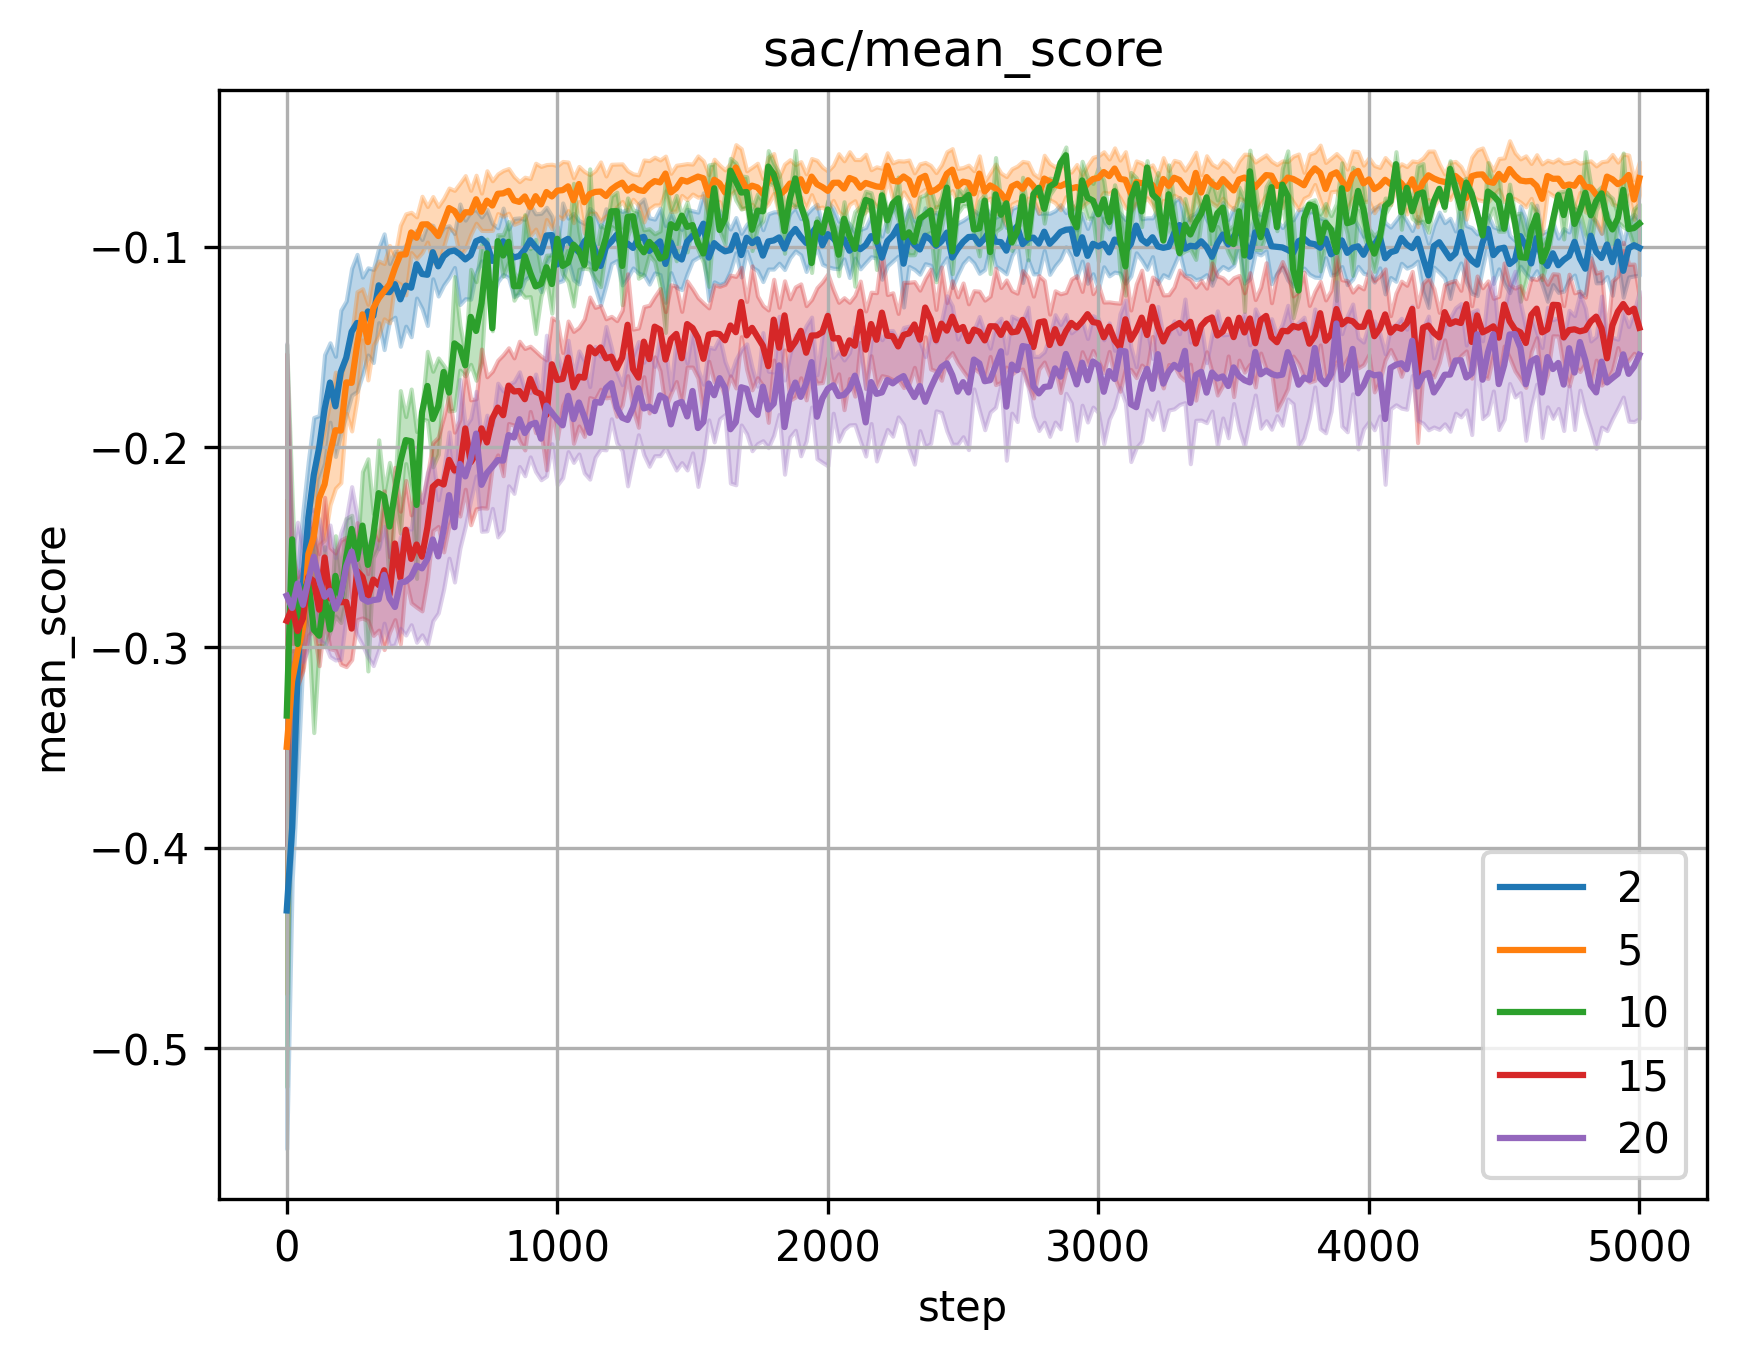

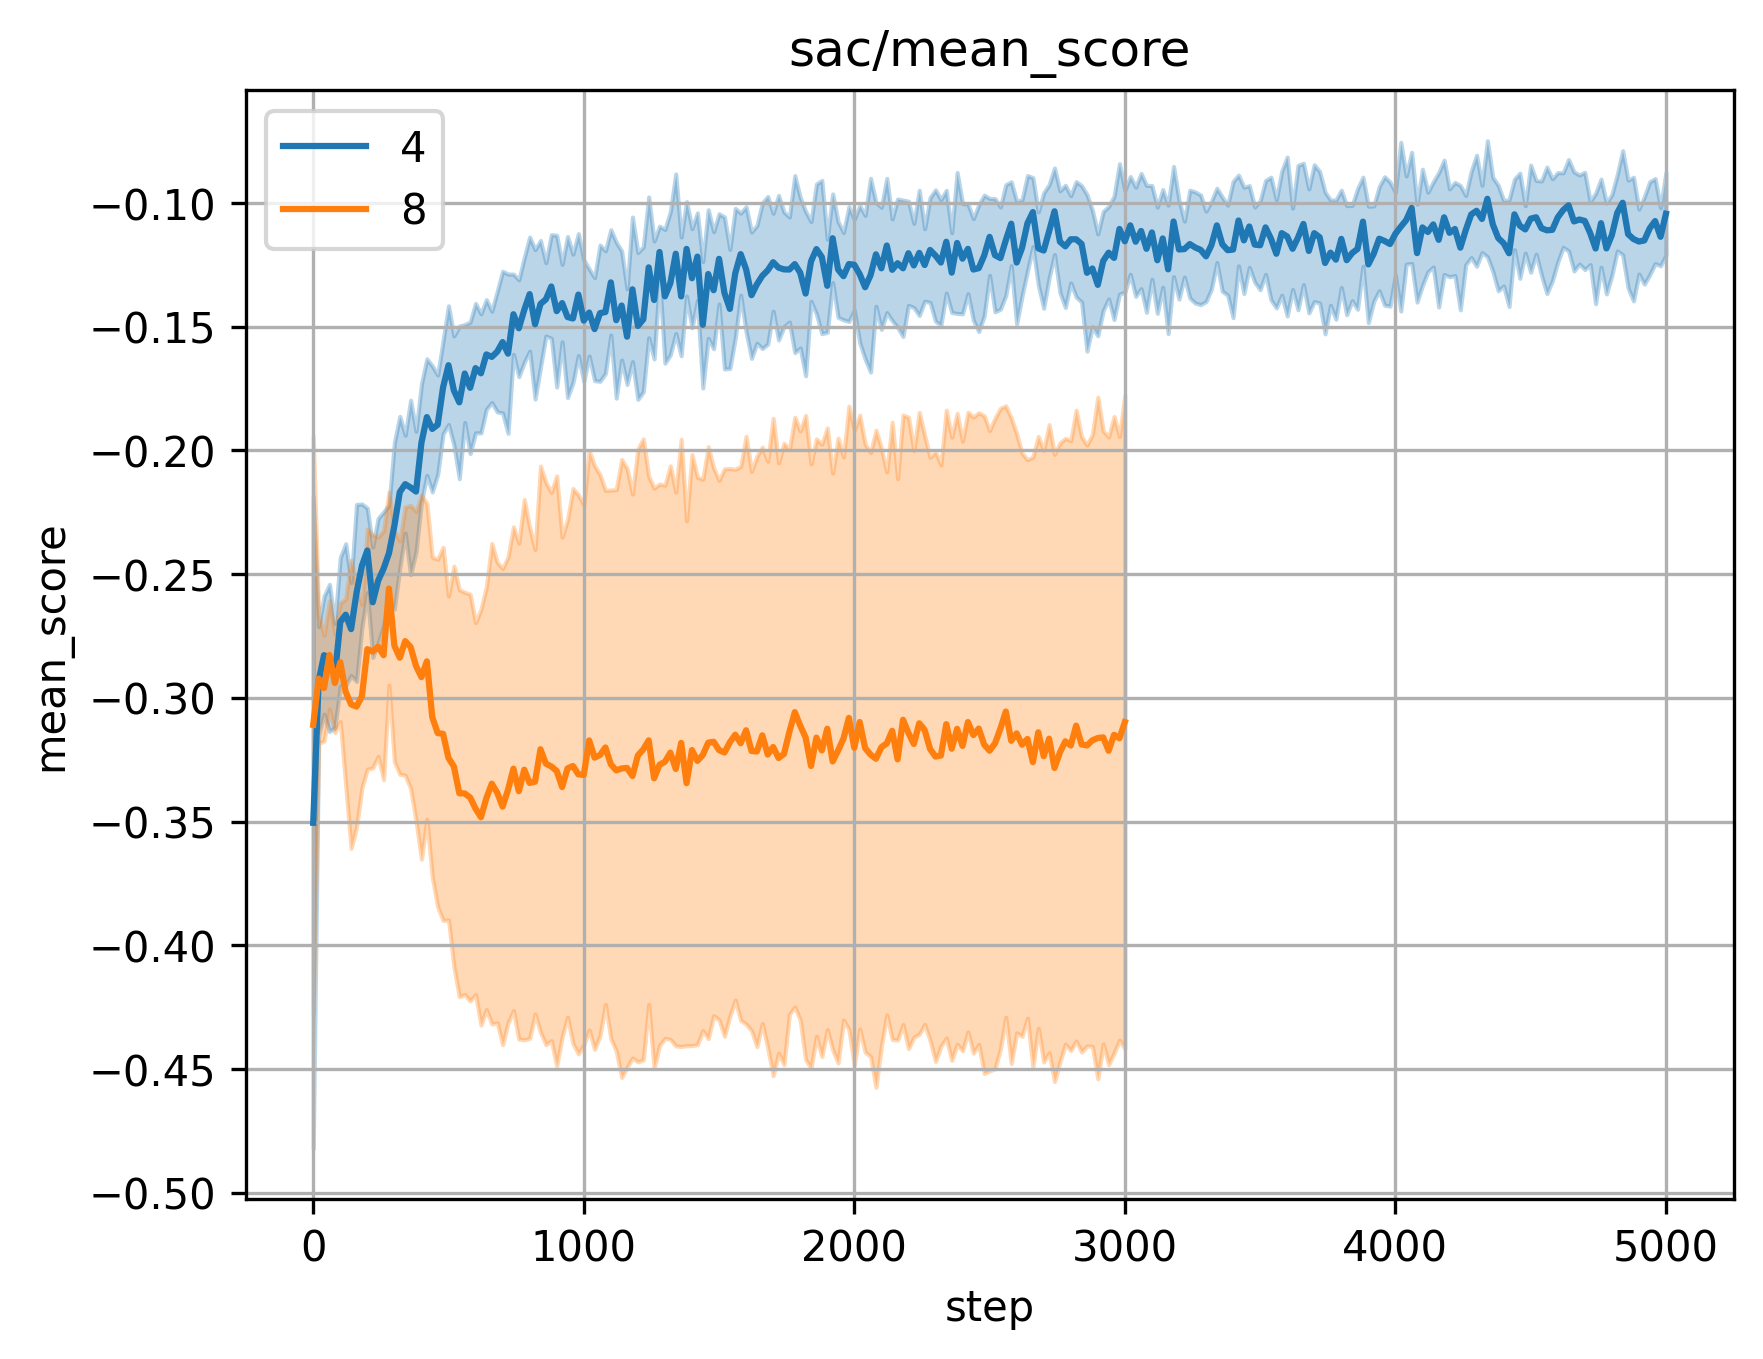

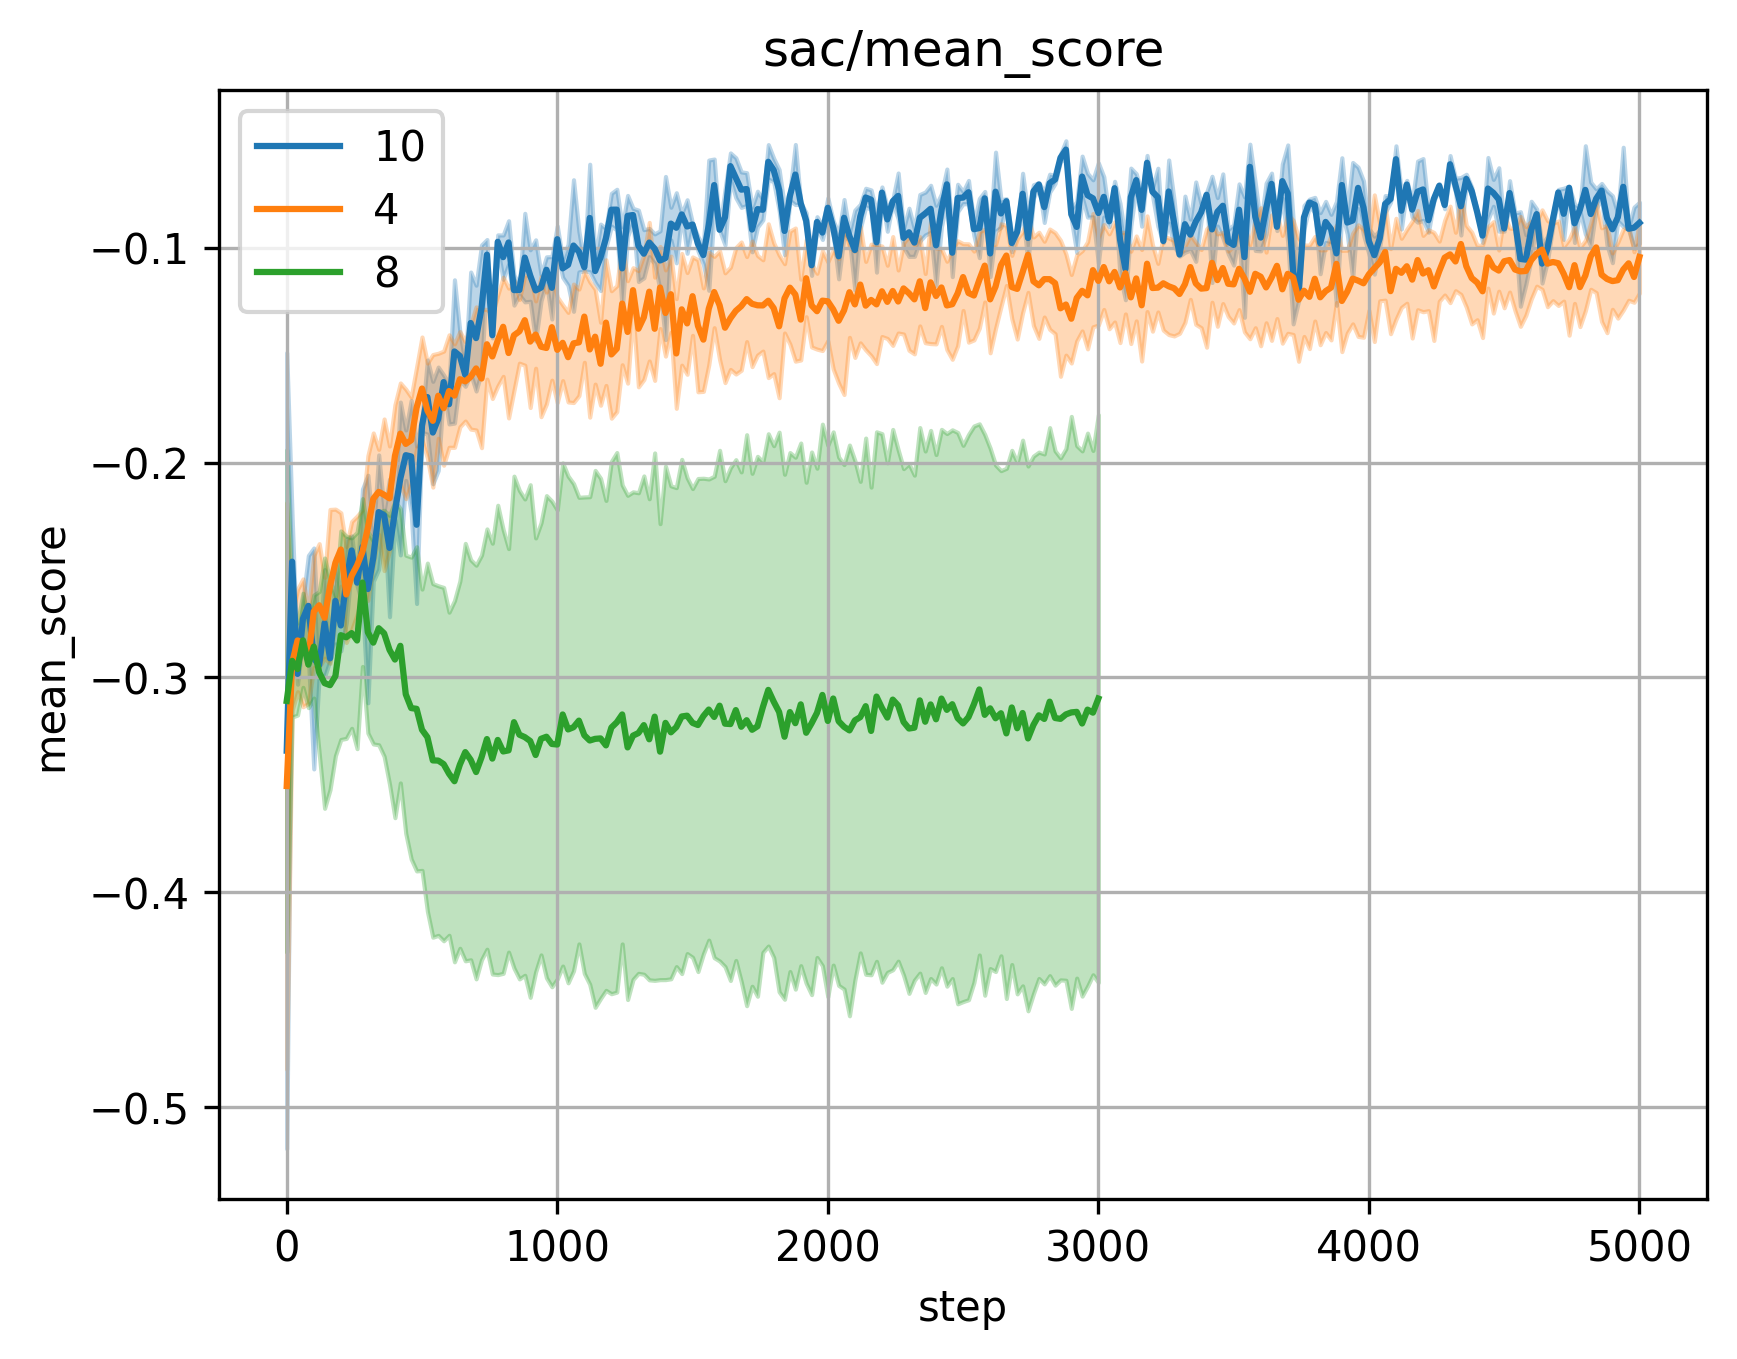

In [46]:

fig, _ = plot_sac_comparison("sac/baseline", [2, 5, 10, 15, 20], "sac/mean_score")
fig.savefig(FIGURE_PATH + "sac_baseline_mean_score.png")
fig, _ = plot_sac_latent_dim_difference(10, [4, 8], key="sac/mean_score")
fig.savefig(FIGURE_PATH + "sac_latent_vae_difference_10_mean_score.png")
fig, _ = plot_baseline_comparison(10, [4, 8], "sac/mean_score")
fig.savefig(FIGURE_PATH + "sac_latent_vae_mean_score.png")


In [47]:
4

4